# PRCP-1023-JohnHopkinsCovid19
## COVID 19 PREDICTION 


### Problem Statement 


Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

Task3:- Make suggestions to the government health department of the country/region for preparation based on your predictions.


### Import the required libraries 

In [1]:
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import numpy as np


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline 


In [3]:
df_conf=pd.read_csv('time_series_covid19_confirmed_global.csv')
df_conf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [4]:
df_recover=pd.read_csv('time_series_covid19_recovered_global.csv')
df_recover

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


In [5]:
df_death=pd.read_csv('time_series_covid19_deaths_global.csv')

In [6]:
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


### Basic Checks

In [7]:
df_recover.shape

(253, 248)

In [8]:
df_conf.shape

(266, 248)

In [9]:
df_death.shape

(266, 248)

## Task 1:-Prepare a complete data analysis report on the given data.

In [10]:
df_conf.rename(columns={'Province/State':'Province', 'Country/Region':'Country'}, inplace = True)
df_conf

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [11]:
df_recover.rename(columns={'Province/State':'Province', 'Country/Region':'Country'}, inplace = True)
df_recover

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


In [12]:
df_death.rename(columns={'Province/State':'Province', 'Country/Region':'Country'}, inplace = True)
df_death

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


In [13]:
df_conf['Status']='Confirmed'

In [14]:
df_recover['Status']='Recovered'

In [15]:
df_death['Status']='Death'

In [16]:
df_conf


,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,Status
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38716,38772,38815,38855,38872,38883,38919,39044,39074,Confirmed
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11353,11520,11672,11816,11948,12073,12226,12385,12535,Confirmed
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48254,48496,48734,48966,49194,49413,49623,49826,50023,Confirmed
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1438,1438,1483,1483,1564,1564,1564,1681,Confirmed
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3388,3439,3569,3675,3789,3848,3901,3991,4117,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,30574,31362,32250,33006,33843,34401,35003,35686,36151,Confirmed
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,Confirmed
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2011,2013,2016,2019,2022,2024,2026,2026,2028,Confirmed
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13539,13720,13819,13887,13928,14022,14070,14131,14175,Confirmed


In [17]:
df_recover

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,Status
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31638,32073,32098,32503,32505,32576,32576,32576,32576,Recovered
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6569,6615,6668,6733,6788,6831,6888,6940,6995,Recovered
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,34037,34204,34385,34517,34675,34818,34923,35047,35180,Recovered
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,945,945,1054,1054,1164,1164,1164,1199,Recovered
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1301,1324,1332,1401,1405,1443,1445,1445,1449,Recovered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,20082,21406,21804,22209,23060,23333,23446,23700,24428,Recovered
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,Recovered
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1212,1215,1219,1221,1221,1221,1221,1227,1235,Recovered
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12260,12380,12590,12869,13029,13207,13365,13365,13629,Recovered


In [18]:
df_death

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,Status
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1420,1425,1426,1436,1436,1437,1437,1441,1444,Death
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334,338,340,343,347,353,358,362,364,Death
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1612,1620,1632,1645,1654,1659,1665,1672,1679,Death
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,Death
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,134,136,139,143,144,147,147,152,154,Death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,221,226,229,243,244,250,253,262,265,Death
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Death
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,583,583,583,583,585,585,585,586,586,Death
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,320,324,326,326,329,330,330,331,Death


In [19]:
df_confT=pd.melt(frame=df_conf, id_vars=['Province','Country','Lat','Long', 'Status'], var_name= 'Date', value_name= 'Count')

In [20]:
df_confT

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Confirmed,1/22/20,0
...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,Confirmed,9/21/20,36151
64900,NaN,Western Sahara,24.215500,-12.885800,Confirmed,9/21/20,10
64901,NaN,Yemen,15.552727,48.516388,Confirmed,9/21/20,2028
64902,NaN,Zambia,-13.133897,27.849332,Confirmed,9/21/20,14175


In [21]:
df_recoverT=pd.melt(frame=df_recover, id_vars=['Province','Country','Lat','Long', 'Status'], var_name= 'Date', value_name= 'Count')

In [22]:
df_recoverT

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Recovered,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Recovered,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Recovered,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Recovered,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Recovered,1/22/20,0
...,...,...,...,...,...,...,...
61727,NaN,West Bank and Gaza,31.952200,35.233200,Recovered,9/21/20,24428
61728,NaN,Western Sahara,24.215500,-12.885800,Recovered,9/21/20,8
61729,NaN,Yemen,15.552727,48.516388,Recovered,9/21/20,1235
61730,NaN,Zambia,-13.133897,27.849332,Recovered,9/21/20,13629


In [23]:
df_deathT=pd.melt(frame=df_death, id_vars=['Province','Country','Lat','Long', 'Status'], var_name= 'Date', value_name= 'Count')

In [24]:
df_deathT

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Death,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Death,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Death,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Death,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Death,1/22/20,0
...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,Death,9/21/20,265
64900,NaN,Western Sahara,24.215500,-12.885800,Death,9/21/20,1
64901,NaN,Yemen,15.552727,48.516388,Death,9/21/20,586
64902,NaN,Zambia,-13.133897,27.849332,Death,9/21/20,331


In [25]:
Totaldata = pd.concat([df_confT, df_recoverT, df_deathT])

In [26]:
Totaldata.head()

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.93911,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.15330,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,Confirmed,1/22/20,0


In [27]:
Totaldata.head(20)

,Province,Country,Lat,Long,Status,Date,Count
0,NaN,Afghanistan,33.939110,67.709953,Confirmed,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Confirmed,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Confirmed,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Confirmed,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Confirmed,1/22/20,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,Confirmed,1/22/20,0
6,NaN,Argentina,-38.416100,-63.616700,Confirmed,1/22/20,0
7,NaN,Armenia,40.069100,45.038200,Confirmed,1/22/20,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,Confirmed,1/22/20,0
9,New South Wales,Australia,-33.868800,151.209300,Confirmed,1/22/20,0


In [28]:
Totaldata.tail(20)

,Province,Country,Lat,Long,Status,Date,Count
64884,Anguilla,United Kingdom,18.220600,-63.068600,Death,9/21/20,0
64885,Bermuda,United Kingdom,32.307800,-64.750500,Death,9/21/20,9
64886,British Virgin Islands,United Kingdom,18.420700,-64.640000,Death,9/21/20,1
64887,Cayman Islands,United Kingdom,19.313300,-81.254600,Death,9/21/20,1
64888,Channel Islands,United Kingdom,49.372300,-2.364400,Death,9/21/20,48
64889,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,Death,9/21/20,0
64890,Gibraltar,United Kingdom,36.140800,-5.353600,Death,9/21/20,0
64891,Isle of Man,United Kingdom,54.236100,-4.548100,Death,9/21/20,24
64892,Montserrat,United Kingdom,16.742498,-62.187366,Death,9/21/20,1
64893,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,Death,9/21/20,5


## Datetime Module 
#### Datetime module supplies classes to work with date and time. These classes provide several functions to deal with dates, times,
#### and time intervals

In [29]:
Totaldata['Date']= pd.to_datetime(Totaldata['Date'])

C:\Users\AKASH\AppData\Local\Temp\ipykernel_31636\2583819881.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Totaldata['Date']= pd.to_datetime(Totaldata['Date'])


In [30]:
Totaldata.set_index('Date', inplace= True)

In [31]:
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,NaN,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,NaN,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,NaN,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,NaN,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,NaN,West Bank and Gaza,31.952200,35.233200,Death,265
2020-09-21,NaN,Western Sahara,24.215500,-12.885800,Death,1
2020-09-21,NaN,Yemen,15.552727,48.516388,Death,586


In [32]:
Totaldata.dtypes

Province     object
Country      object
Lat         float64
Long        float64
Status       object
Count         int64
dtype: object

In [33]:
Totaldata.index[0]

Timestamp('2020-01-22 00:00:00')

In [34]:
Totaldata.index[1]

Timestamp('2020-01-22 00:00:00')

In [35]:
date =Totaldata.index[-1]

In [36]:
Totaldata.isnull().sum()

Province    135664
Country          0
Lat              0
Long             0
Status           0
Count            0
dtype: int64

In [37]:
Totaldata

,Province,Country,Lat,Long,Status,Count
Date,,,,,,
2020-01-22,NaN,Afghanistan,33.939110,67.709953,Confirmed,0
2020-01-22,NaN,Albania,41.153300,20.168300,Confirmed,0
2020-01-22,NaN,Algeria,28.033900,1.659600,Confirmed,0
2020-01-22,NaN,Andorra,42.506300,1.521800,Confirmed,0
2020-01-22,NaN,Angola,-11.202700,17.873900,Confirmed,0
...,...,...,...,...,...,...
2020-09-21,NaN,West Bank and Gaza,31.952200,35.233200,Death,265
2020-09-21,NaN,Western Sahara,24.215500,-12.885800,Death,1
2020-09-21,NaN,Yemen,15.552727,48.516388,Death,586


## Summary of columns, data types, and missing values are given below 

In [38]:
print(Totaldata.info())  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191540 entries, 2020-01-22 to 2020-09-21
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  55876 non-null   object 
 1   Country   191540 non-null  object 
 2   Lat       191540 non-null  float64
 3   Long      191540 non-null  float64
 4   Status    191540 non-null  object 
 5   Count     191540 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ MB
None


### Fill NaN values in 'Province' with 'Unknown' or drop the column

In [39]:
Totaldata['Province'] = Totaldata['Province'].fillna('Unknown')

Totaldata = Totaldata.fillna(0)

In [40]:
Totaldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191540 entries, 2020-01-22 to 2020-09-21
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Province  191540 non-null  object 
 1   Country   191540 non-null  object 
 2   Lat       191540 non-null  float64
 3   Long      191540 non-null  float64
 4   Status    191540 non-null  object 
 5   Count     191540 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ MB


### Importing the required libraries 

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Filter by status, e.g., Confirmed or Death for a specific country 
### Dropping the unnecessary columns 

In [42]:
country_data = Totaldata[(Totaldata['Country'] == 'Afghanistan') & (Totaldata['Status'] == 'Confirmed')]

# Drop the unnecessory coloumns 

country_data = country_data[['Count']]


### Filling missing values if any

In [43]:
country_data = country_data.fillna(0)


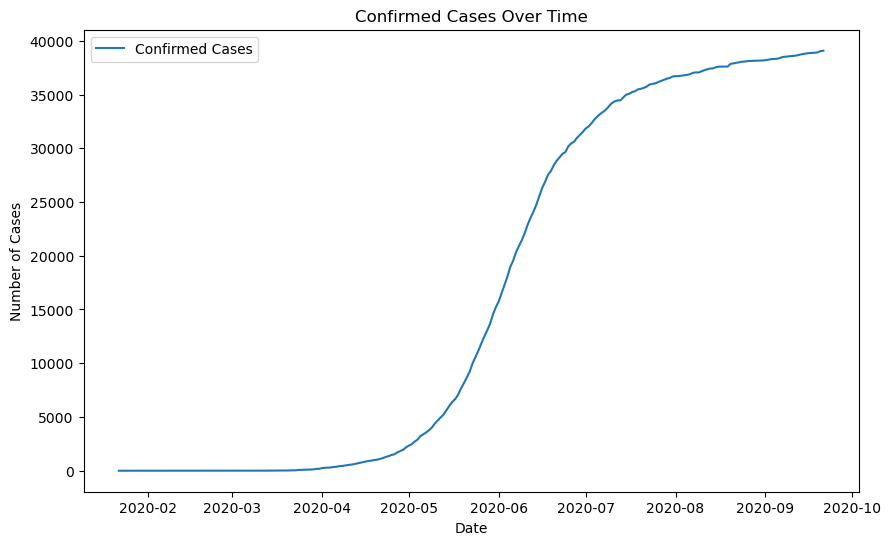

In [44]:
plt.figure(figsize=(10,6))
plt.plot(country_data, label='Confirmed Cases')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


### Splitting the data into train and test splits 

In [45]:
train_data, test_data = train_test_split(country_data, test_size=0.2, shuffle=False)


### Using the Holt-Winters exponential smoothing model
### The Holt-Winters method — also known as triple exponential smoothing. It is a method for time series forcasting 
### The Holt-Winters method is a very common time series forecasting procedure capable of including both trend and seasonality. 
### The Holt-Winters method itself is a combination of 3 other much simpler components, all of which are smoothing methods
###   - Simple Exponential Smoothing (SES): Simple exponential smoothing assumes that the time series has no change in level. Thus, it can not be used with series that contain trend, seasonality, or both.
###   - Holt’s Exponential Smoothing (HES): Holt’s exponential smoothing is one step above simple exponential smoothing, as it allows the time series data to have a trend component. Holt’s exponential smoothing is still incapable of cope with seasonal data.
###   - Winter’s Exponential Smoothing (WES): Winter’s exponential smoothing is an extension to Holt’s exponential smoothing that finally allows for the inclusion of seasonality. Winter’s exponential smoothing is what is referred to as the Holt-Winters method.


In [46]:
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
hw_model = model.fit()


C:\Users\AKASH\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Forecasted for the next period (length of the test data)

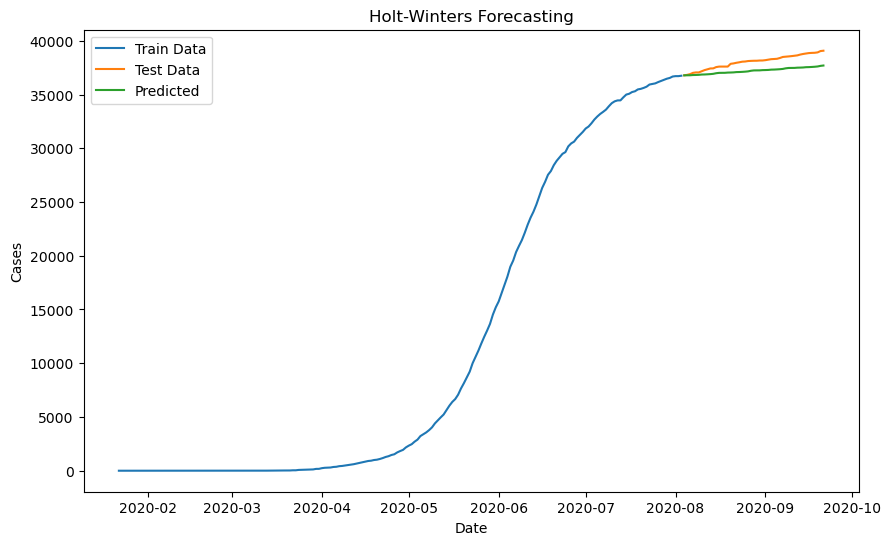

In [47]:
# Forecasted for the next period (length of the test data)
pred = hw_model.forecast(steps=len(test_data))

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(pred, label='Predicted')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()


### Calculated the root mean squared error (RMSE)
#### Root mean squared error (RMSE) is a widely used metric for evaluating the accuracy of a model's predictions by measuring the average magnitude of the errors between predicted and observed values. 
#### It Is particularly useful in forecasting techniques, as it provides a way to quantify how well a model is performing by giving greater weight to larger errors, thus highlighting any discrepancies between predicted outcomes and actual results.

In [48]:
rmse = np.sqrt(mean_squared_error(test_data, pred))
print(f'RMSE: {rmse}')


RMSE: 914.1112894629339


In [49]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


### Imported the Prophet model 

22:15:19 - cmdstanpy - INFO - Chain [1] start processing
22:15:20 - cmdstanpy - INFO - Chain [1] done processing


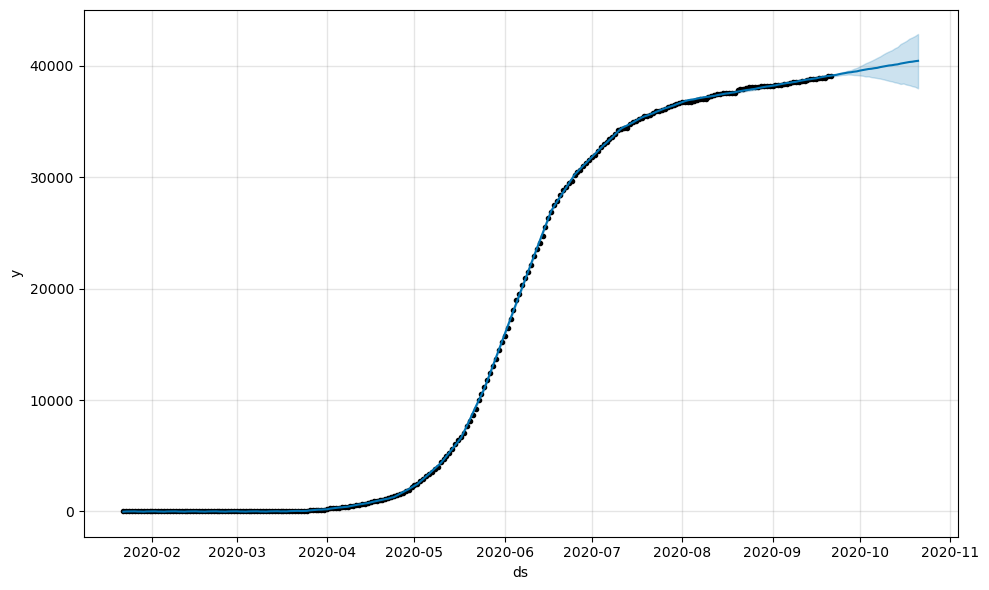

In [50]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = country_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Initialize the model and fit
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()


### Imported the ARIMA model 

C:\Users\AKASH\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AKASH\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AKASH\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\AKASH\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\AKASH\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  195
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1108.170
Date:                Wed, 09 Oct 2024   AIC                           2232.339
Time:                        22:49:17   BIC                           2258.482
Sample:                    01-22-2020   HQIC                          2242.925
                         - 08-03-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0926      0.124     -0.749      0.454      -0.335       0.150
ar.L2         -0.0554      0.128     -0.435      0.664      -0.305       0.195
ar.L3          0.4262      0.093      4.575      0.0

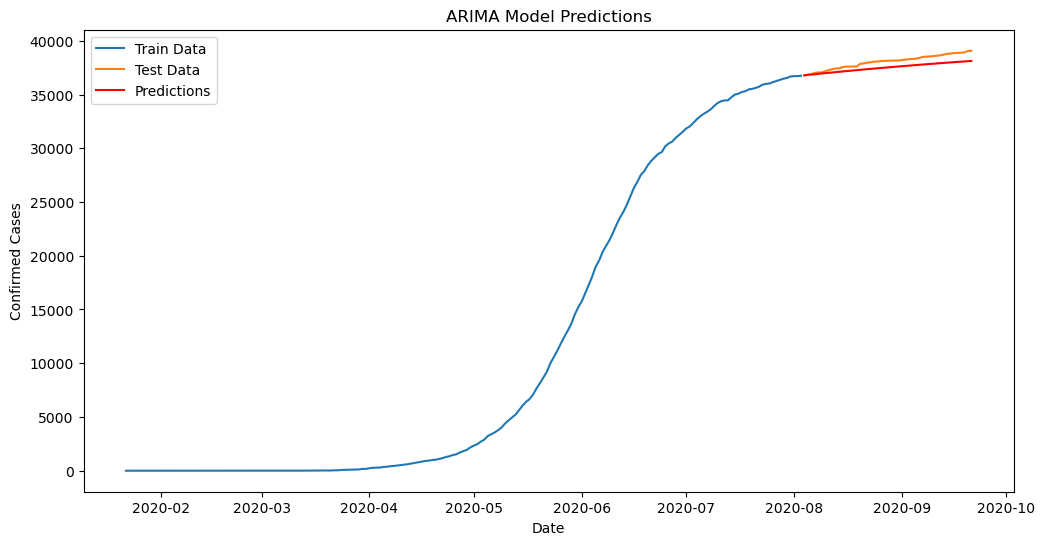

In [57]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model (you can adjust the p, d, q values)
arima_model = ARIMA(train_data['Count'], order=(5, 1, 2))  # You can tune (p,d,q)
arima_fit = arima_model.fit()

# Print summary of the model
print(arima_fit.summary())

# Make predictions on the test set
test_data['Predictions'] = arima_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Plot the train, test, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Count'], label='Train Data')
plt.plot(test_data.index, test_data['Count'], label='Test Data')
plt.plot(test_data.index, test_data['Predictions'], label='Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

### Calculated Mean Squared Error for Arima (MSE)
#### Mean squared error (MSE) is a metric used to measure the average squared difference between the predicted values and the actual values in the dataset. It is calculated by taking the average of the squared residuals, where the residual is the difference between predicted value and the actual value for each data point. 
#### The MSE value provides a way to analyze the accuracy of the model.



In [59]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Count'], test_data['Predictions'])
print(f'Mean Squared Error for ARIMA: {mse}')

Mean Squared Error for ARIMA: 352474.3329804786


### Forecasted future cases for the next 30 days
### Created a date range for future predictions

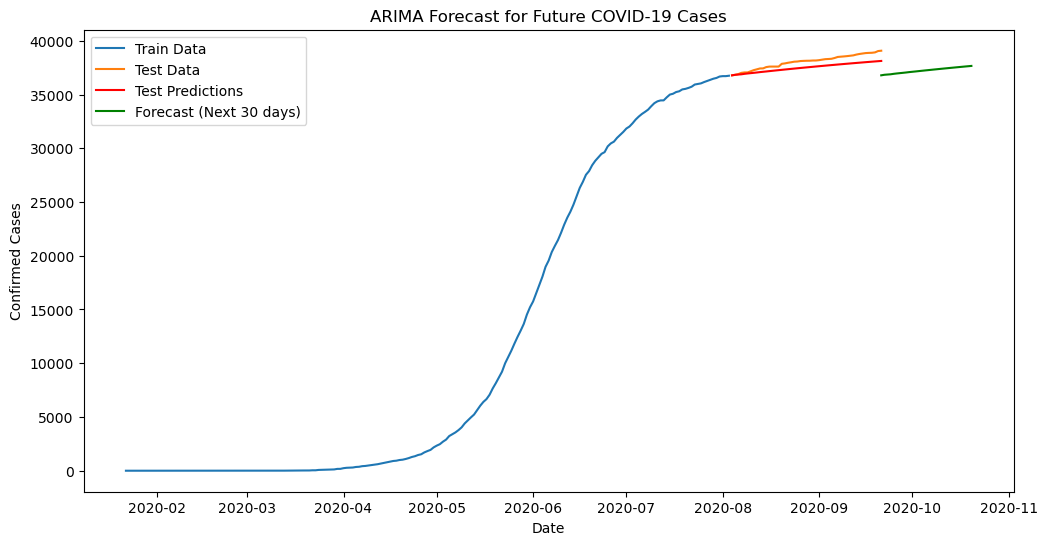

In [61]:
# Forecast future cases for the next 30 days
future_steps = 30
forecast = arima_fit.forecast(steps=future_steps)

# Create a date range for future predictions
forecast_dates = pd.date_range(test_data.index[-1], periods=future_steps, freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Count'], label='Train Data')
plt.plot(test_data.index, test_data['Count'], label='Test Data')
plt.plot(test_data.index, test_data
         ['Predictions'], label='Test Predictions', color='red')
plt.plot(forecast_dates, forecast, label='Forecast (Next 30 days)', color='green')
plt.title('ARIMA Forecast for Future COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()